Importing required libraries

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,plot_confusion_matrix

Loading tha dataset

In [52]:
df= pd.read_csv("C:\\Users\\User\\Desktop\\Projects\\Heart disease\\heart.csv")


let's have a look at data

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [55]:
df.shape

(303, 14)

dataset contains 14 features(columns) and 303 rows

In [56]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


let's check if dataset contains any null values.

In [57]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

dataset does not contain any null value.

EDA (exploratory data analysis)

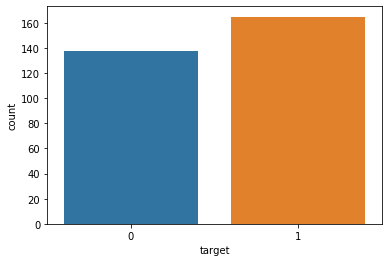

In [58]:
sns.countplot(x='target',data=df)

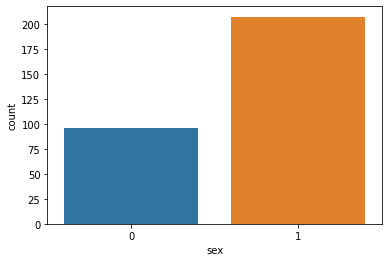

In [59]:
sns.countplot(x='sex',data=df)

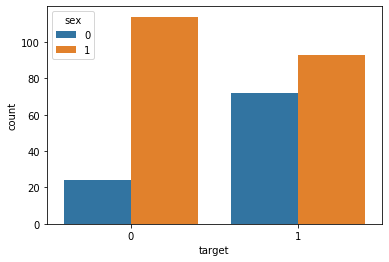

In [60]:
sns.countplot(x='target',hue='sex',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C98986A48>,
      dtype=object)

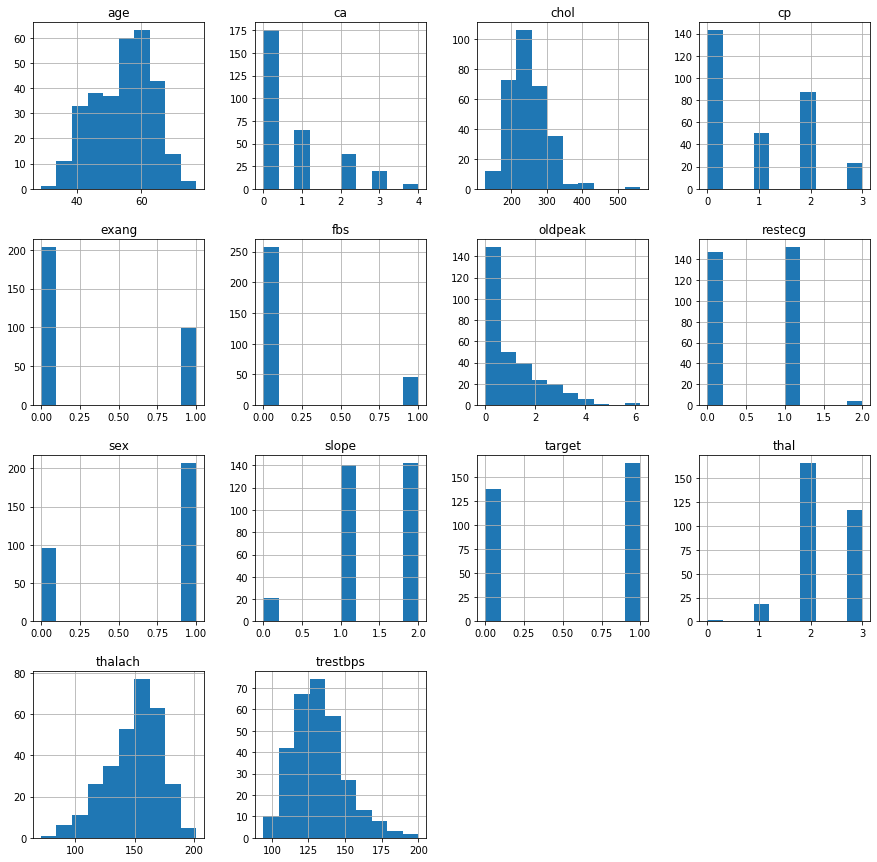

In [61]:
df.hist(figsize=(15,15))

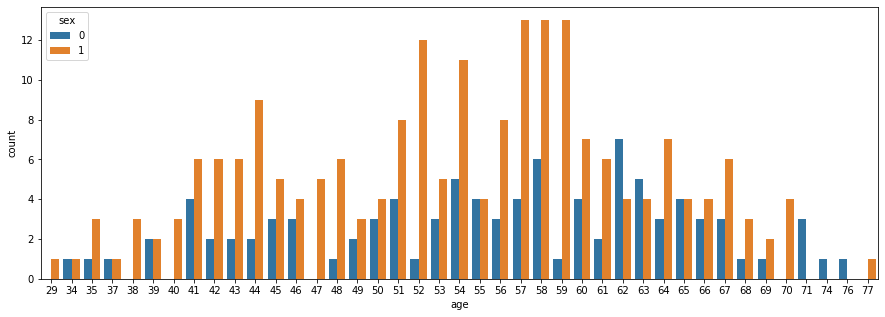

In [62]:
plt.figure(figsize=(15,5))
sns.countplot('age',data = df,hue='sex')

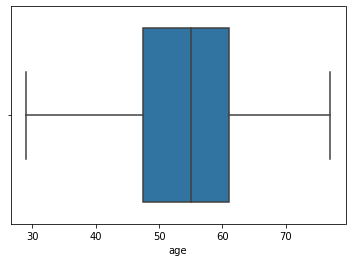

In [63]:
sns.boxplot(df['age'])

checking for correlation

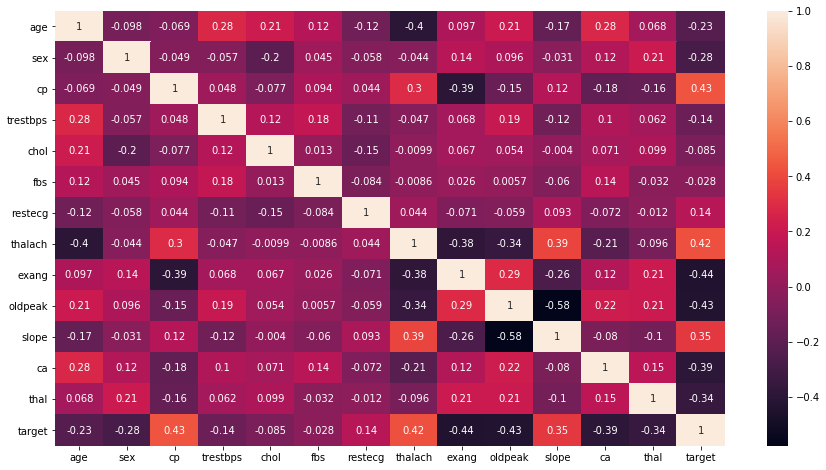

In [64]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

<Figure size 1080x576 with 0 Axes>

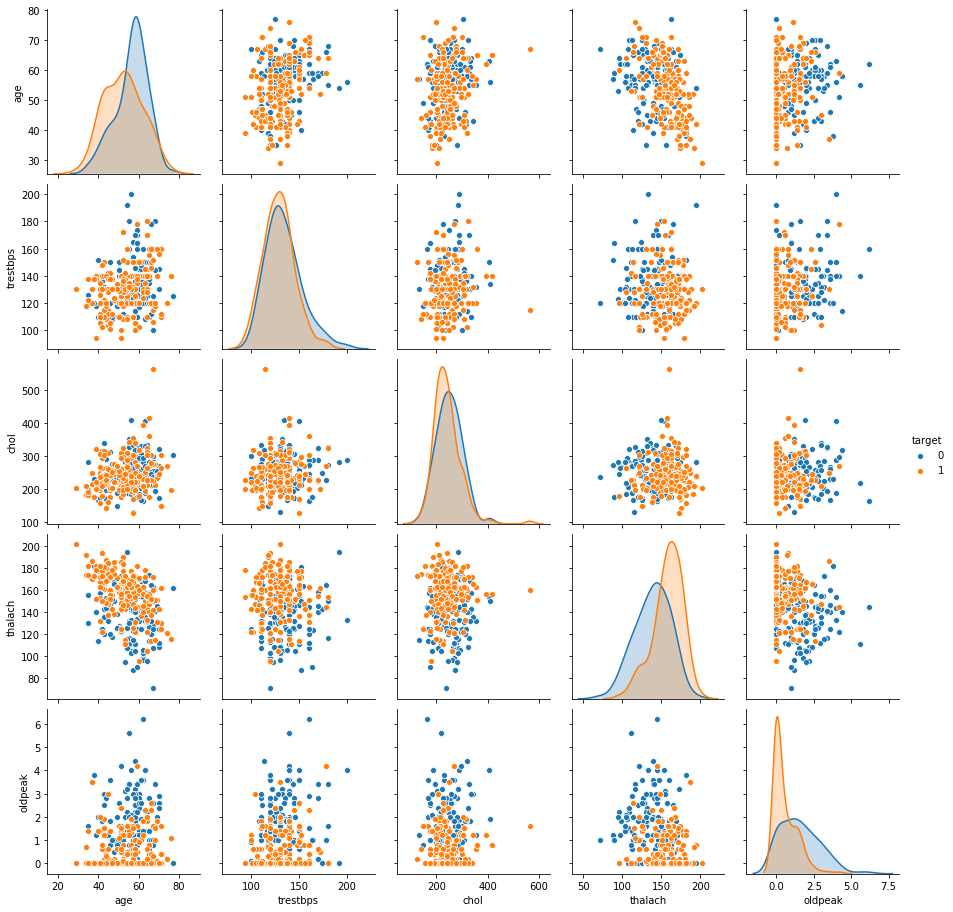

In [65]:
plt.figure(figsize=(15,8))
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','target']],hue='target')

<function matplotlib.pyplot.show(*args, **kw)>

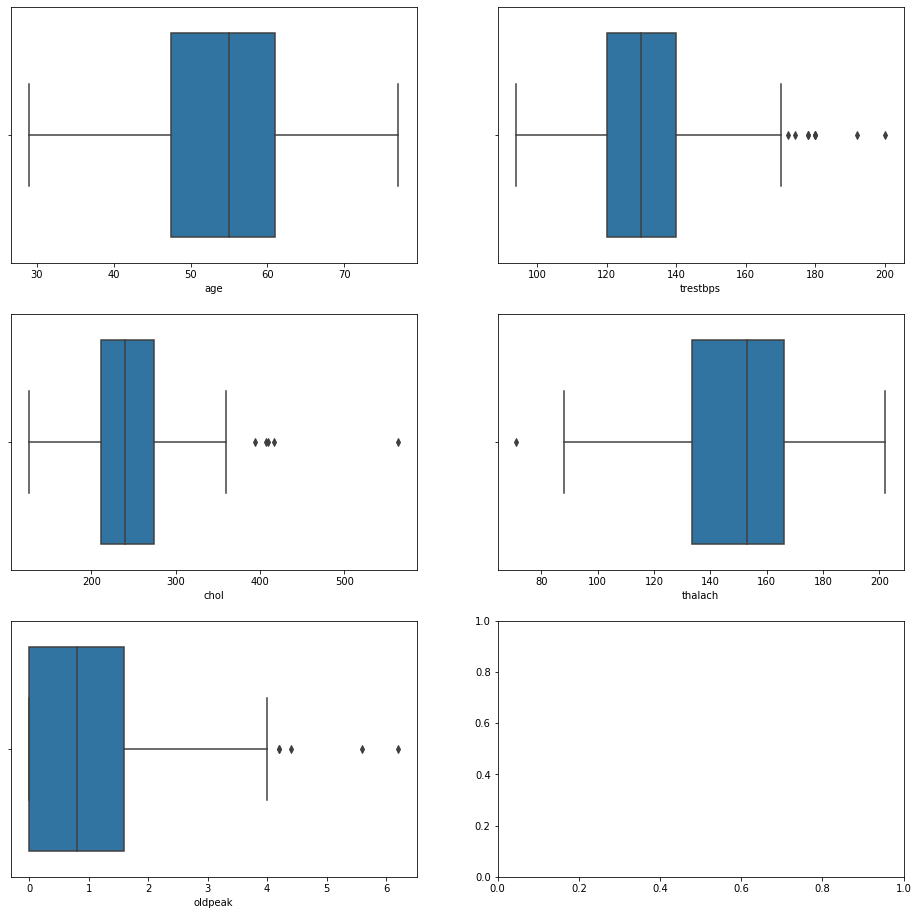

In [66]:
fig,axes = plt.subplots(3,2,figsize = (16,16))
sns.boxplot(ax=axes[0,0],data=df,x=df['age'])
sns.boxplot(ax=axes[0,1],data=df,x=df['trestbps'])
sns.boxplot(ax=axes[1,0],data=df,x=df['chol'])
sns.boxplot(ax=axes[1,1],data=df,x=df['thalach'])
sns.boxplot(ax=axes[2,0],data=df,x=df['oldpeak'])
plt.show

preparing dataset for model fitting

In [67]:
X=df.drop('target',axis=1)
y=df['target']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LOGISTIC REGRESSION

In [69]:
model=LogisticRegression()

In [70]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_pred=model.predict(X_test)

In [98]:
model.score(X_test,y_test)

0.8852459016393442

In [72]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[25  4]
 [ 3 29]]


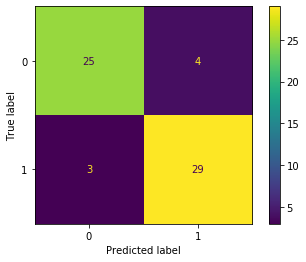

In [73]:
plot_confusion_matrix(model, X_test, y_test,labels=[0,1],ax=None)

In [101]:
roc_auc_score(y_test,y_pred)

0.8841594827586207

In [102]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Logistic regression did perform well with an accuracy of 0.89 and auc-roc score of 0.88.

# Random forest classifier

In [84]:
model2 = RandomForestClassifier()

In [121]:
model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
y_pred2=model2.predict(X_test)

In [126]:
model2.score(X_test,y_test)

0.8524590163934426

In [87]:
cm2=confusion_matrix(y_test,y_pred2)
print(cm2)

[[24  5]
 [ 4 28]]


hyperparameter tuning with grid search cv.

In [88]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
             }

In [89]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = model2, param_grid = param_grid, cv = 3, verbose=2)

In [90]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17 
[CV]  max_depth=2, max

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25, total=   0.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=41 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=41, total=   0.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_s

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   25.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [91]:
grid.best_params_

{'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 33}

In [112]:
model3 = RandomForestClassifier(max_depth=2,max_features='auto',min_samples_leaf=2,min_samples_split=5,n_estimators=33)

In [113]:
model3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=33,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
y_pred3 = model3.predict(X_test)

In [115]:
model3.score(X_test,y_test)

0.9180327868852459

In [116]:
cm3=confusion_matrix(y_test,y_pred3)
print(cm3)

[[26  3]
 [ 2 30]]


In [117]:
roc_auc_score(y_test,y_pred3)

0.9170258620689655

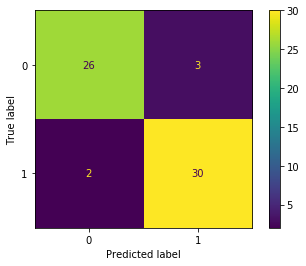

In [118]:
plot_confusion_matrix(model3, X_test, y_test,labels=[0,1],ax=None)

In [119]:
print(metrics.classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.91      0.94      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



After tuning the parameters for random forest classifier model we achieved an accuracy of 0.92 and auc-roc score of 0.91. 